<a href="https://colab.research.google.com/github/IT24102088/Plant-Disease-Detection-System-PG-NO-147/blob/main/Notebooks/Resize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resizing images

Resizing images is an essential preprocessing step in deep learning models, especially in computer vision tasks. Neural networks require inputs of a fixed dimension because the convolutional and fully connected layers are designed to process tensors of consistent shape. Without resizing, images of different resolutions would cause dimension mismatches, making it impossible to feed them into the model.

*   All images have the same size, which stabilizes training and improves convergence
*   Smaller, resized images reduce computational load and memory usage, allowing faster training.
*   Consistent input sizes help the model focus on learning important features instead of being biased by varying image scales

In short, resizing is important not only for technical compatibility but also for efficiency and better feature extraction.








In [1]:
!pip install kaggle
import os
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''



In [2]:
!kaggle datasets download -d "vipoooool/new-plant-diseases-dataset" -p /content/drive/MyDrive/datasets/

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
from IPython.display import clear_output
!unzip /content/drive/MyDrive/datasets/new-plant-diseases-dataset.zip
clear_output()

In [4]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import cv2

sns.set_style("whitegrid")

In [5]:
from pathlib import Path
from PIL import Image
import pandas as pd


root_dir = Path('/content/New Plant Diseases Dataset(Augmented)')


image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff', '*.JPG', '*.JPEG']

image_paths = []
for ext in image_extensions:

    image_paths.extend(list(root_dir.rglob(ext)))


heights = []
widths = []
aspect_ratios = []

for img_path in image_paths:
    try:
        with Image.open(img_path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
            aspect_ratios.append(height / width)
    except Exception as e:

        print(f"Error opening {img_path}: {e}")
        continue


df = pd.DataFrame({
    'file_path': image_paths[:len(widths)],
    'width': widths,
    'height': heights,
    'aspect_ratio': aspect_ratios
})
print("Dataset Dimension Statistics:")
print(f"Number of images: {len(df)}")
print(df[['width', 'height', 'aspect_ratio']].describe())

Dataset Dimension Statistics:
Number of images: 87867
         width   height  aspect_ratio
count  87867.0  87867.0       87867.0
mean     256.0    256.0           1.0
std        0.0      0.0           0.0
min      256.0    256.0           1.0
25%      256.0    256.0           1.0
50%      256.0    256.0           1.0
75%      256.0    256.0           1.0
max      256.0    256.0           1.0


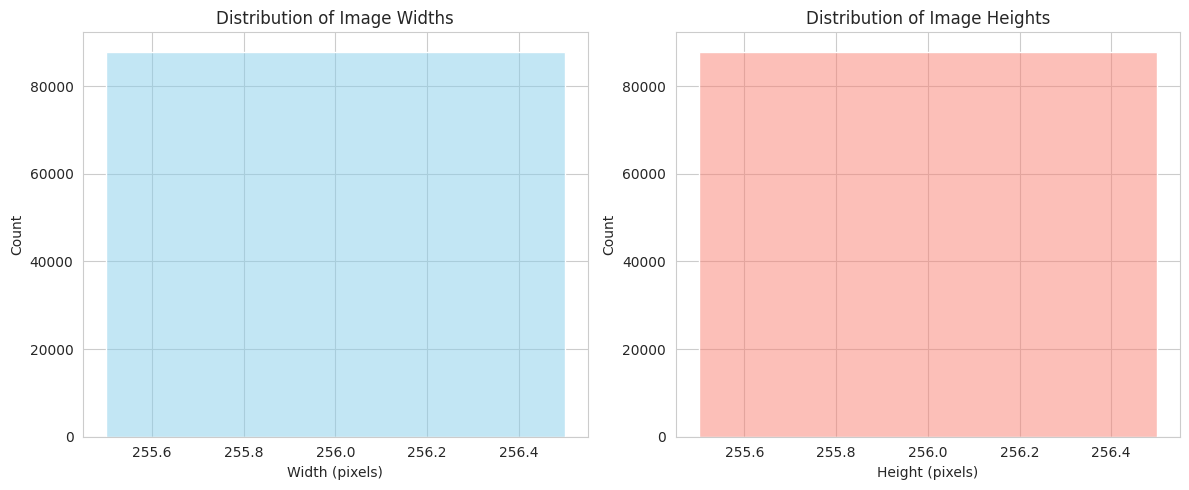

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['width'], kde=True, color='skyblue')
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')

plt.subplot(1, 2, 2)
sns.histplot(df['height'], kde=True, color='salmon')
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')

plt.tight_layout()
plt.show()

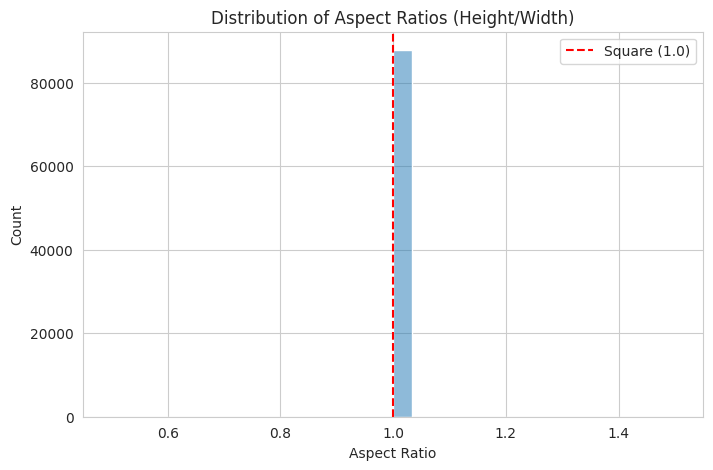

Top 5 Aspect Ratios:
aspect_ratio
1.0    87867
Name: count, dtype: int64


In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['aspect_ratio'], kde=True, bins=30)
plt.axvline(1.0, color='red', linestyle='--', label='Square (1.0)')
plt.title('Distribution of Aspect Ratios (Height/Width)')
plt.xlabel('Aspect Ratio')
plt.legend()
plt.show()


print("Top 5 Aspect Ratios:")
print(df['aspect_ratio'].round(2).value_counts().head())

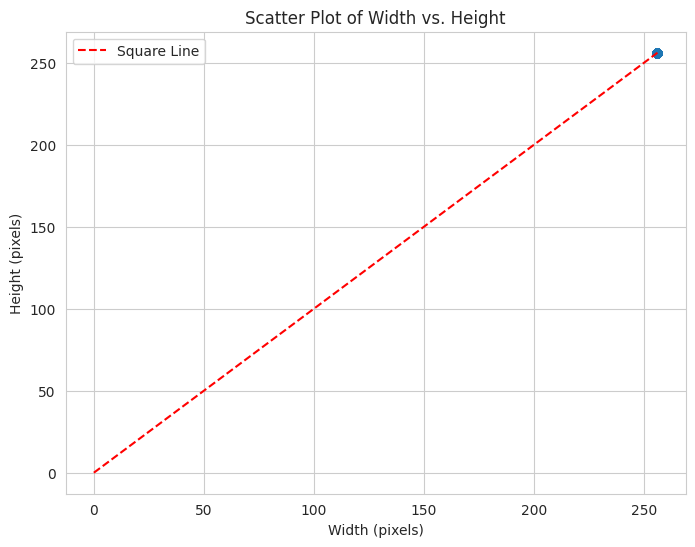

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df['width'], df['height'], alpha=0.5)
plt.title('Scatter Plot of Width vs. Height')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')

max_val = max(df['width'].max(), df['height'].max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Square Line')
plt.legend()
plt.show()